# План семинара

1. Установка Anaconda и запуск Jupyter notebook
2. Оформление решений с использованием Jupyter notebook
3. Реализация отдельных блоков моделирования
4. Вывод графики
    - графики линий
    - графики гистограмм

Приложение А. Формулы Latex
Приложение Б. Репрезентативный блок MarkDown
Приложение В. Прочие ссылки

# 1. Установка Anaconda


1. [Скачать с сайта дистрибутив Anaconda](https://www.anaconda.com/download)
2. Установить его с параметрами по умолчанию
3. Варианты запуска jupyter notebook
    - В пуск вбить Jupyter и запустить Jupyter notebook
    - В пуск вбить Anaconda и запустить Anaconda Prompt, зайти в нужную папку, используя команду `cd нужная папка` (пример смены диска - `D:`), и набрать в ней `jupyter-notebook`
    - Открыть папку используя IDE на ваш выбор ([vs code](https://code.visualstudio.com/) или [py charm](https://www.jetbrains.com/pycharm/))
    
    

# 2. Оформление решения

## Кодовые ячейки
1) Инициализация, импорт библиотек

In [57]:
import numpy as np
from matplotlib import pyplot as plt

model_rate = 1e9    # частота дискретизации при моделировании
adc_rate = 1e6      # частота дискретизации АЦП
n = 10000            # число отсчётов


# 3. Моделирование сигнала

Выполнено моделирование сигналов с разными распредлениями

<img src="ADC_improved.png" alt="ADC_improved" width="800"/>

Схема компрессор-АЦП-экспандер (Не рекомендую использовать кириллицу в названиях файлов)

In [58]:


t_mod = np.arange(0,n)/model_rate
t_adc = np.arange(0,n*int(adc_rate/model_rate))/adc_rate

x_rayl = np.random.rayleigh(scale=1, size=(n,))      # моделирование сигнала с релеевским распределением
x_norm = np.random.normal(loc=0,scale=1,size=(n,))   # нормально распред. СВ мат.ож.=0 и ско=1
x_unif = np.random.uniform(low=0, high=4, size=(n,))  # равномерно распред. СВ в границах [0,4]
# прочие см. в документации


# 4. Графики

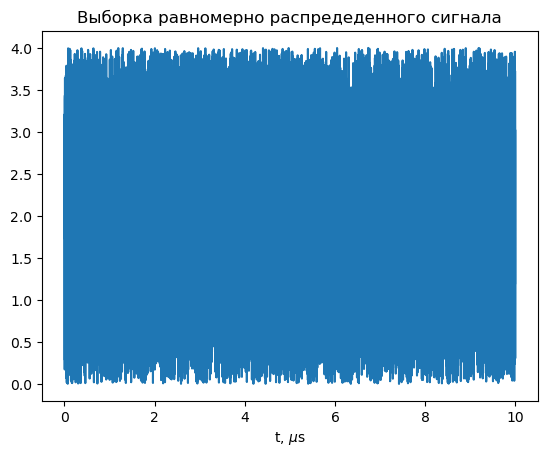

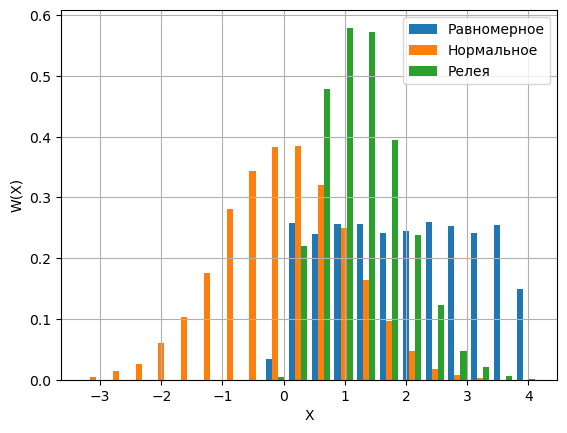

In [59]:
def plot_sig(t,x,title=None):
    ax = plt.subplot()
    ax.plot(t*1e6,x)
    if title is not None:
        plt.title(title)
        
    plt.xlabel(r't, $\mu$s')    # использую latex для вывода буквы мю (=микросекунды)
    plt.show()

plot_sig(t_mod,x_unif, title='Выборка равномерно распредеденного сигнала')   # вывод реализации

x_all = tuple(map(lambda x: x[:, np.newaxis],(x_unif, x_norm, x_rayl)))
x_all = np.concatenate(x_all, axis=1) # 

ax = plt.subplot()
ax.grid(True)       # Сетка
ax.hist(x_all, bins=20, density=True)     # Гистограмма (число интервалов - 20), нормировка для получения плотности вероятности включена
plt.xlabel('X')
plt.ylabel('W(X)')
plt.legend(("Равномерное", "Нормальное", "Релея"))
plt.show()

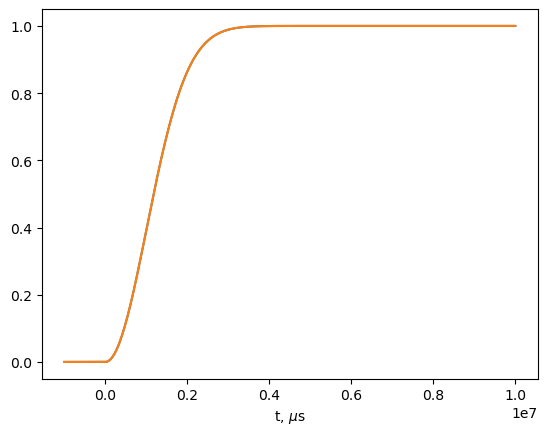

In [60]:
from scipy import stats
X = np.linspace(-1,10,1000)
X = X[:,np.newaxis] # добавляю еще одну размерность к массиву (1000x1) чтобы далее удобно склеить матрицы по горизонтали
sc=1    # устанаваливаю сигма параметр в формуле, равный scale заданному при формировании распределения (выше)
ray_cdf = lambda x: (1 - np.exp(-x**2 / (2*sc**2)))*(x>=0) # задаю функцию распределение вручную
# ray_cdf - функция, которая используется ниже в качестве компрессора
ray_cdf_lib = stats.rayleigh.cdf(X, scale=1) # простой способ получить плотность вероятности для сравнения с заданным вручную
# ray_cdf_lib - массив чтобы проверить, что правильно задали функцию распределеления вероятности
plot_sig(X,np.concatenate((ray_cdf_lib,ray_cdf(X)),axis=1))


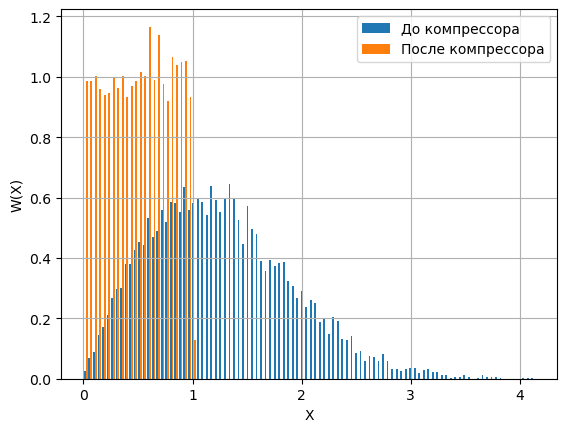

In [61]:
y = ray_cdf(x_rayl)  # компрессор

x_all = tuple(map(lambda x: x[:, np.newaxis],(x_rayl, y)))
x_all = np.concatenate(x_all, axis=1) # 

ax = plt.subplot()
ax.grid(True)       # Сетка
ax.hist(x_all, bins=100, density=True)     # Гистограмма (число интервалов - 20), нормировка для получения плотности вероятности включена
plt.xlabel('X')
plt.ylabel('W(X)')
plt.legend(("До компрессора", 'После компрессора'))
plt.show()


# Приложение


## Преобразование LATEX в Word (MathML)
Библиотека для python [latex2mathml](https://pypi.org/project/latex2mathml/)
Использование latex2mathml в консоли: ```latex2mathml -t "x=y^2"```.


## Системы уравнений
$$
\left\{
  \begin{array}{ccc}
    x = y+z, & x>y\\
    y = z+x, & x\leq y\\
  \end{array}
\right.
$$
Длинные уравнения
split, &=, \\\\
$$ \begin{split}
A &= {\pi r^2 \over 2} \\
&= {1 \over 2} \pi r^2
\end{split}
$$

## Матрица
$$
\left[
  \begin{array}{ccc}
     x_1 & x_2 & x_3 \\
     y_1 & y_2 & y_3 \\
	 z_1 & z_2 & z_3 \\
  \end{array}
\right]
$$

## Подчёркивания
$\overline{n_s}$
$\underline{n_s}$


## Вероятности

Связь условной вероятности с совместной
$$p(y_j|x_i)={p(x_i,y_j)\over p(x_i)}$$

Связь совместной вероятности с условной
$$p(x_i,y_j)=p(x_i|y_j)\cdot p(y_j)$$

Связь условной и апостериорной вероятностей
$$p(x_i|y_j)p(y_j)=p(y_j|x_i)p(x_i)$$

Априорная вероятность появления символа на выходе
$$p(y_j)=\sum_{i=0}^{n-1}{p(x_i,y_j)}$$

Условие нормировки условной вероятности
$$\sum_{j=0}^{m-1}{p(y_j|x_i)}=1$$

Взаимная информация I(x,y)
количество информации, доставляемое событием y о событии x (эквивалентно количеству информации, доставляемому событием x о событии y)
$$I(x_i;y_j)=\log_2\left({p(x_i|y_i))\over p(x_i)}\right)$$

Собственная информация события
количество информации, доставляемое самим событием x
$$I(x_i)=-\log_2 p(x_i)$$

Собственная информация совместного события x и y
количество информации, доставляемое совокупностью событий x и y, отличается от взаимной информации I(x;y)
$$I(x_i\, y_j) = -\log_2(p(x_i,y_j)$$

Условная собственная информация события x
характеризует максимальное количество информации, которое способно доставить само событие x при условии, что событие y известно
$$I(x_i|y_j)=-\log_2(p(x_i|y_j)$$

Среднее количество взаимной информации
$$I(X;Y) = \sum_{i=0}^{n-1}{\sum_{j=0}^{m-1}{p(x_i,y_j)I(x_i;y_j)}} = \sum_{i=0}^{n-1}{\sum_{j=0}^{m-1}{p(x_i,y_j)(-\log_2(p(x_i,y_j))}}$$

Энтропия
средняя собственная информация источника
$H(x) = I(X) = - \sum_{i=0}^{n-1}{p(x_i)\log(p(x_i))}$

Избыточность источника
$$\rho=1-{H(X)\over H_{max}(X)}=1 - {H(X)\over \log_2(n)}$$

Условная энтропия
количество информации, которая характеризует степень неопределенности значений случайной величины Y, остающуюся после того, как стало известно значение, принятое случайной величиной X
$$H(X|Y)=\sum_{i=0}^{n-1}{\sum_{j=0}^{m-1}{p(x_i,y_j)\log_2(p(x_i|y_j))}}$$


## Тригонометрия

###### Основные тригонометрические тождества
$$\sin^2x + \cos^2x= 1$$
$$\operatorname {tg} ^{2}a +1=\frac {1}{\cos ^{2}a },
(a \neq {\frac  {\pi }{2}}+\pi n,n\in {\mathbb  Z} )$$
$$\operatorname {ctg}^{2}a +1={\frac  {1}{\sin ^{2}a }}, 
(a \neq \pi n,n\in {\mathbb  Z})$$
$$ \operatorname {tg} a \cdot \operatorname {ctg} a =1,
(a \neq {\frac  {\pi n}{2}},n\in {\mathbb  Z})$$

###### Формулы сложения и вычитания аргументов
$$\sin \left(a \pm b \right)=\sin a \cos b \pm \cos a \sin b$$
$$\cos \left(a \pm b \right)=\cos a \cos b \mp \sin a \sin b$$
$$\operatorname {tg} \left(a \pm b \right)=\frac {\operatorname {tg} a \pm \operatorname {tg} b }{1\mp \operatorname {tg} a \operatorname {tg} b }$$
$$\operatorname {ctg}\left(a \pm b \right)=\frac {\operatorname {ctg}a \operatorname {ctg}b \mp 1}{\operatorname {ctg}b \pm \operatorname {ctg}a }$$

###### Формулы двойного угла
$$\sin 2a =2{\sin a }\ {\cos a }={\frac {2\operatorname {tg} a }{1+\operatorname {tg} ^{2}a }}$$
$$\cos 2a ={\cos ^{2}a }-{\sin ^{2}a }=2{\cos ^{2}a }-1=1-2{\sin ^{2}a }$$
$$\operatorname {tg}2a ={\frac  {2\operatorname {tg}a }{1-\operatorname {tg}^{2}a }}$$
$$\operatorname {ctg}2a ={\frac  {\operatorname {ctg}^{2}a -1}{2\operatorname {ctg}a }}$$

###### Понижение степени
$$\sin ^{2}a ={\frac {1-\cos 2a }{2}}$$
$$\cos ^{2}a ={\frac {1+\cos 2a }{2}}$$
$$\sin ^{2}a \cos ^{2}a =\frac {1-\cos 4a }{8}$$

###### Формулы преобразования произведения
$$\sin a \sin b ={\frac  {\cos(a -b )-\cos(a +b )}{2}}$$
$$\sin a \cos b ={\frac  {\sin(a -b )+\sin(a +b )}{2}}$$
$$\cos a \cos b ={\frac  {\cos(a -b )+\cos(a +b )}{2}}$$

###### Формулы преобразования суммы функций
$$\sin a \pm \sin b =2\sin {\frac  {a \pm b }{2}}\cos {\frac  {a \mp b }{2}}$$
$$\cos a +\cos b =2\cos {\frac  {a +b }{2}}\cos {\frac  {a -b }{2}}$$
$$\cos a -\cos b =-2\sin {\frac  {a +b }{2}}\sin {\frac  {a -b }{2}}$$
$$\operatorname {tg}a \pm \operatorname {tg}b ={\frac  {\sin(a \pm b )}{\cos a \cos b }}$$
$$\operatorname {ctg}a \pm \operatorname {ctg}b ={\frac  {\sin(b \pm a )}{\sin a \sin b }}$$

###### Формула Эйлера
$$e^{ix}=\cos x + i \sin x$$
$$\sin x={\frac  {e^{{ix}}-e^{{-ix}}}{2i}}$$
$$\cos x={\frac {e^{ix}+e^{-ix}}{2}}$$
$$e^{{i\pi }}+1=0$$

## Интегралы

###### Базовые правила интегрирования элементарных функций
$$\int Cf(x)\,dx=C\int f(x)\,dx$$
 $$\int [f(x) + g(x)]\,dx = \int f(x)\,dx + \int g(x)\,dx$$
$$\int f(x)g(x)\,dx=f(x)\int g(x)\,dx-\int \left(\int g(x)\,dx\right)\,df(x)$$
$$\int f(ax+b)\,dx = {1 \over a} F(ax+b)\,+C$$
$$\int \!0\,dx=C$$
$$\int \!a\,dx=ax+C$$
$$\int \!x^{n}\,dx={\begin{cases}{
\frac {x^{n+1}}{n+1}}+C,&n\neq -1 \\ \ln \left|x\right|+C,&n=-1
\end{cases}}$$
$$\int\!{dx \over {a^2+x^2}} = {1 \over a}\operatorname{arctg}\frac{x}{a} + C = - {1 \over a}\operatorname{arcctg} \frac{x}{a} + C$$

###### Логарифмы

$$\int\!\ln {x}\,dx = x \ln {x} - x + C$$
$$\int \frac{dx}{x\ln x} = \ln|\ln x|+ C$$
$$\int\!\log_b {x}\,dx = x\log_b {x} - x\log_b {e} + C = x\frac{\ln {x} - 1}{\ln b} + C$$
$$\int\!e^x\,dx = e^x + C$$
$$\int\!a^x\,dx = \frac{a^x}{\ln{a}} + C$$
$$\int_{-\infty}^\infty{e^{-x^2}}dx=\sqrt{\pi}$$

###### Тригонометрические функции
$$\int\!\sin{x}\, dx = -\cos{x} + C$$
$$\int\!\cos{x}\, dx = \sin{x} + C$$
$$\int\!\operatorname{tg}\, {x} \, dx = -\ln{\left| \cos {x} \right|} + C$$
$$\int\!\operatorname{ctg}\, {x} \, dx = \ln{\left| \sin{x} \right|} + C$$
$$\int\!\sin^2 x \, dx = \frac{1}{2}(x - \sin x \cos x) + C$$
$$\int\!\cos^2 x \, dx = \frac{1}{2}(x + \sin x \cos x) + C$$
$$\int \arcsin x\,dx=x\arcsin x+{\sqrt {1-x^{2}}}+C$$
$$\int \arcsin {\frac {x}{a}}\,dx=x\arcsin {\frac {x}{a}}+{\sqrt {a^{2}-x^{2}}}+C$$
$$\int \arccos x\,dx=x\arccos x-{\sqrt {1-x^{2}}}+C$$

$$\int \arccos {\frac {x}{a}}\,dx=x\arccos {\frac {x}{a}}-{\sqrt {a^{2}-x^{2}}}+C$$
$$\int \operatorname {arctg} \,x\,dx=x\,\operatorname {arctg} \,x-{\frac {1}{2}}\ln(1+x^{2})+C$$
$$\int \operatorname {arctg} \,{\frac {x}{a}}\,dx=x\,\operatorname {arctg} \,{\frac {x}{a}}-{\frac {a}{2}}\ln(1+{\frac {x^{2}}{a^{2}}})+C$$
$$\int \operatorname {arcctg} \,x\,dx=x\,\operatorname {arcctg} \,x+{\frac {1}{2}}\ln(1+x^{2})+C$$
$$\int \operatorname {arcctg} \,{\frac {x}{a}}\,dx=x\,\operatorname {arcctg} \,{\frac {x}{a}}+{\frac {a}{2}}\ln(a^{2}+x^{2})+C$$

###### Интегрирование сложных функций
$$\int u\,dv=u\,v-\int v\,du$$
$$\int \limits _{a}^{b}u\,dv=u\,v\,{\bigg |}_{a}^{b}-\int \limits _{a}^{b}v\,du$$
$$\int g(x) f(G(x))dx = \int f(G(x)) dG(x) \rightarrow \int_a^b x f(x^2) dx = \int_a^b f(x^2) d({x^2\over2})$$
$$$$


## Производные
###### Производные элемемнтарных функций
$${d \over dx}\sin x=\cos x$$
$${d \over dx}\cos x=-\sin x$$
$${d \over dx}\,\operatorname {tg}\,x={1 \over \cos ^{2}x}=\operatorname {tg}^{2}x+1$$
$${d \over dx}\,\operatorname {ctg} \,x=-{1 \over \sin ^{2}x}$$
$${d \over dx}\arcsin x={1 \over {\sqrt  {1-x^{2}}}}$$
$${d \over dx}\arccos x=-{1 \over {\sqrt {1-x^{2}}}}$$
$${d \over dx}\,\operatorname {arctg}\,x={1 \over 1+x^{2}}$$
$${d \over dx}\,\operatorname {arcctg} \,x=-{1 \over 1+x^{2}}$$

###### Производные сложных функций
$$\left({cf}\right)'=cf'$$
$$\left({f+g}\right)'=f'+g'$$
$$\left({f-g}\right)'=f'-g'$$
$$\left({fg}\right)'=f'g+fg'$$
$$\left({f \over g}\right)'={f'g-fg' \over g^{2}},\qquad g\neq 0$$
$$(f^{g})'=\left(e^{g\ln f}\right)'=f^{g}\left(f'{g \over f}+g'\ln f\right),\qquad f>0$$
$${\frac  {d}{dx}}f(g(x))={\frac  {df(g)}{dg}}\cdot {\frac  {dg(x)}{dx}}=f'_{g}g'_{x}$$

## Пределы
$$\lim_{x\rightarrow 0} {\frac{\sin x}{x}} = 1$$
$$\lim_{x\rightarrow 0} {(1-\cos x)} = \frac{1}{2} x^2$$
$$\lim_{x\rightarrow 0} {\operatorname{tg}x} = \frac{1}{2} x^2$$
$$\lim_{x\rightarrow 0} {\operatorname{ctg}x} = \frac{1}{x}$$
$$\lim_{x\rightarrow 0} {\frac{\ln{(1+x)}}{x}} = 
\lim_{x\rightarrow 0} {\ln{(1+x)}^{1/x} } = 1$$
$$\lim_{x\rightarrow 0} {\ln(1+x)} = x$$
$$\lim_{x\rightarrow 1} {\ln(x)} = x-1$$
$$\lim_{x\rightarrow 0} {e^x-1} = x$$
$$\lim_{x\rightarrow 0} {(1+x)^a} = 1+ax$$

# Формулы статистической радиотехники

Оператор математического ожидания
$$М\{f(x_1,...,x_n)\}=\int_{-\infty}^{\infty}...\int_{-\infty}^{\infty}{f(x_1,...,x_n)W(x1,...,x_n)}dx_1...dx_n$$


$$ |a+jb|^2 = (a+jb)(a-jb) = a^2-b^2 $$